<a href="https://colab.research.google.com/github/heatherp4rk/DATAANALYSIS/blob/main/Dataanalysis_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 분류모델 기초

## 1.1 사이킷런과 머신러닝

### 1.1.1 사이킷런 소개

**Classification**
* e.g. 물건을 구매함/안 함 여부
* Classifier
* Supervised learning; 정답이 있는 데이터 ( <-> Unsupervised learning)

![image](image/Classification.png)

**Regression**
* 특정 수치 예측
* e.g. 구매 ➡️ 얼마를 구매할 것 인지
* Regressor
* Supervised learning

![image](image/Regression.png)



### 1.1.2 사이킷런 활용 흐름

* Classification, Regression, Clustering, Semi-Supervised Learning, Feature Selection, Feature Extraction, Manifold Learning, Dimensionality Reductino ...

**Supervised Machine Learning**

* Training Data / Training Labels ➡️ 모델 ➡️ 데이터 테스트 ➡️ 예측 ➡️ 평가

**Unsupervised Machine Learning**

* Training Data ➡️ 모델 ➡️ 데이터 테스트 ➡️ New View
    * 정답 데이터가 없음
    * e.g. 차원 축소

**Basic API**
* estimator.fit(X)
* estimator.predict
* estimator.transform

* Training data - Test data
    * Cross Validation: 트레이닝 데이터 모델의 정확도를 높이기 위해 데이터를 나누어서 (Fold) 검증하여 최적의 모수 찾기
        * Feature 추출 > Scaling > Feature 선택 > 모델

**Overfitting and Underfitting**
* underfitting ~ overfitting
    * training 데이터에 대한 예측 정확도가 높아짐
    * test 데이터에 대한 예측 정확도는 새로운 값을 입력할 수록 정확도가 낮아짐
    * 적정 지점을 찾는 것이 중요

**Parameter Search**
* Grid search
* Random search




### 1.1.3 사이킷런의 의사결정나무 알고리즘

**Decision Trees**

**1. Classification**

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y) #fit을 통해 학습을 하게 됨

In [2]:
clf.predict([[2., 2.]])

array([1])

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [5]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

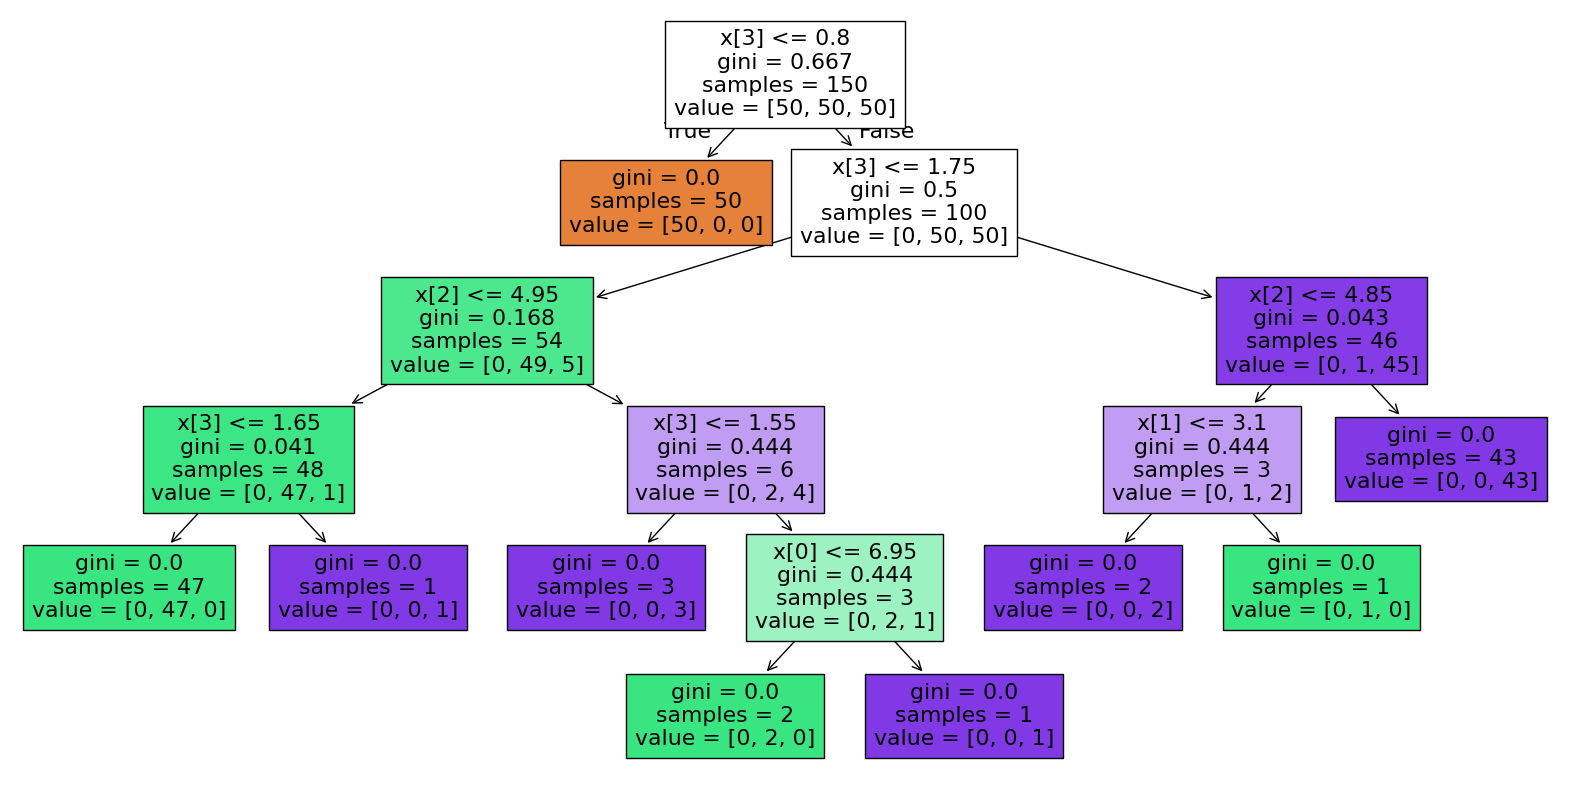

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
t = tree.plot_tree(clf.fit(X, y), filled=True)

## 1.2 의사결정나무로 간단한 분류 예측 모델 만들기

### 1.2.1 당뇨병 데이터셋 소개
* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압
* SkinThickness : 삼두근 피부 주름 두께, 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린
* BMI : 체질량 지수
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수는 1이고 나머지는 0

### 1.2.2 학습과 예측을 위한 데이터셋 만들기

**필요한 라이브러리 로드**

In [16]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**데이터셋 로드**

In [22]:
df = pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [23]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [29]:
# 8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count라는 변수에 담는다.
# split_count

split_count = int(df.shape[0] * 0.8)
split_count

614

In [33]:
# train, test로 슬라이싱을 통해 데이터를 나눈다.
# df[:~] -> ~까지의 값을 가져옴
train = df[:split_count].copy()
train.shape


(614, 9)

In [37]:
test = df[split_count:].copy()
test.shape

(154, 9)

**학습, 예측에 사용할 컬럼**

In [44]:
# feature_names라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

**정답값이자 예측해야 될 값**

In [47]:
# label_name이라는 변수에 예측할 칼럼의 이름을 담는다

label_name = train.columns[-1]
label_name

'Outcome'

**학습, 예측 데이터셋 만들기**

In [52]:
# 학습 세트 만들기

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [57]:
# 정답 값을 만든다

y_train = train[label_name]
print(y_train.shape)
y_train.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [62]:
# 예측에 사용할 데이터세트를 만든다

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614           11      138             74             26      144  36.1   
615            3      106             72              0        0  25.8   
616            6      117             96              0        0  28.7   
617            2       68             62             13       15  20.1   
618            9      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Age  
614                     0.557   50  
615                     0.207   27  
616                     0.157   30  
617                     0.257   23  
618                     1.282   50

In [72]:
# 예측의 정답값
y_test = test[label_name]
print(y_test.shape)
y_test.head()

614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 1.2.3 의사결정나무로 학습과 예측하기
**머신러닝 알고리즘 가져오기**

In [79]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

**학습(훈련)**

In [80]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

**예측**

In [84]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

### 1.2.4 예측한 모델의 성능 측정하기

**트리 알고리즘 분석하기**
의사결정나무를 시각화 한다

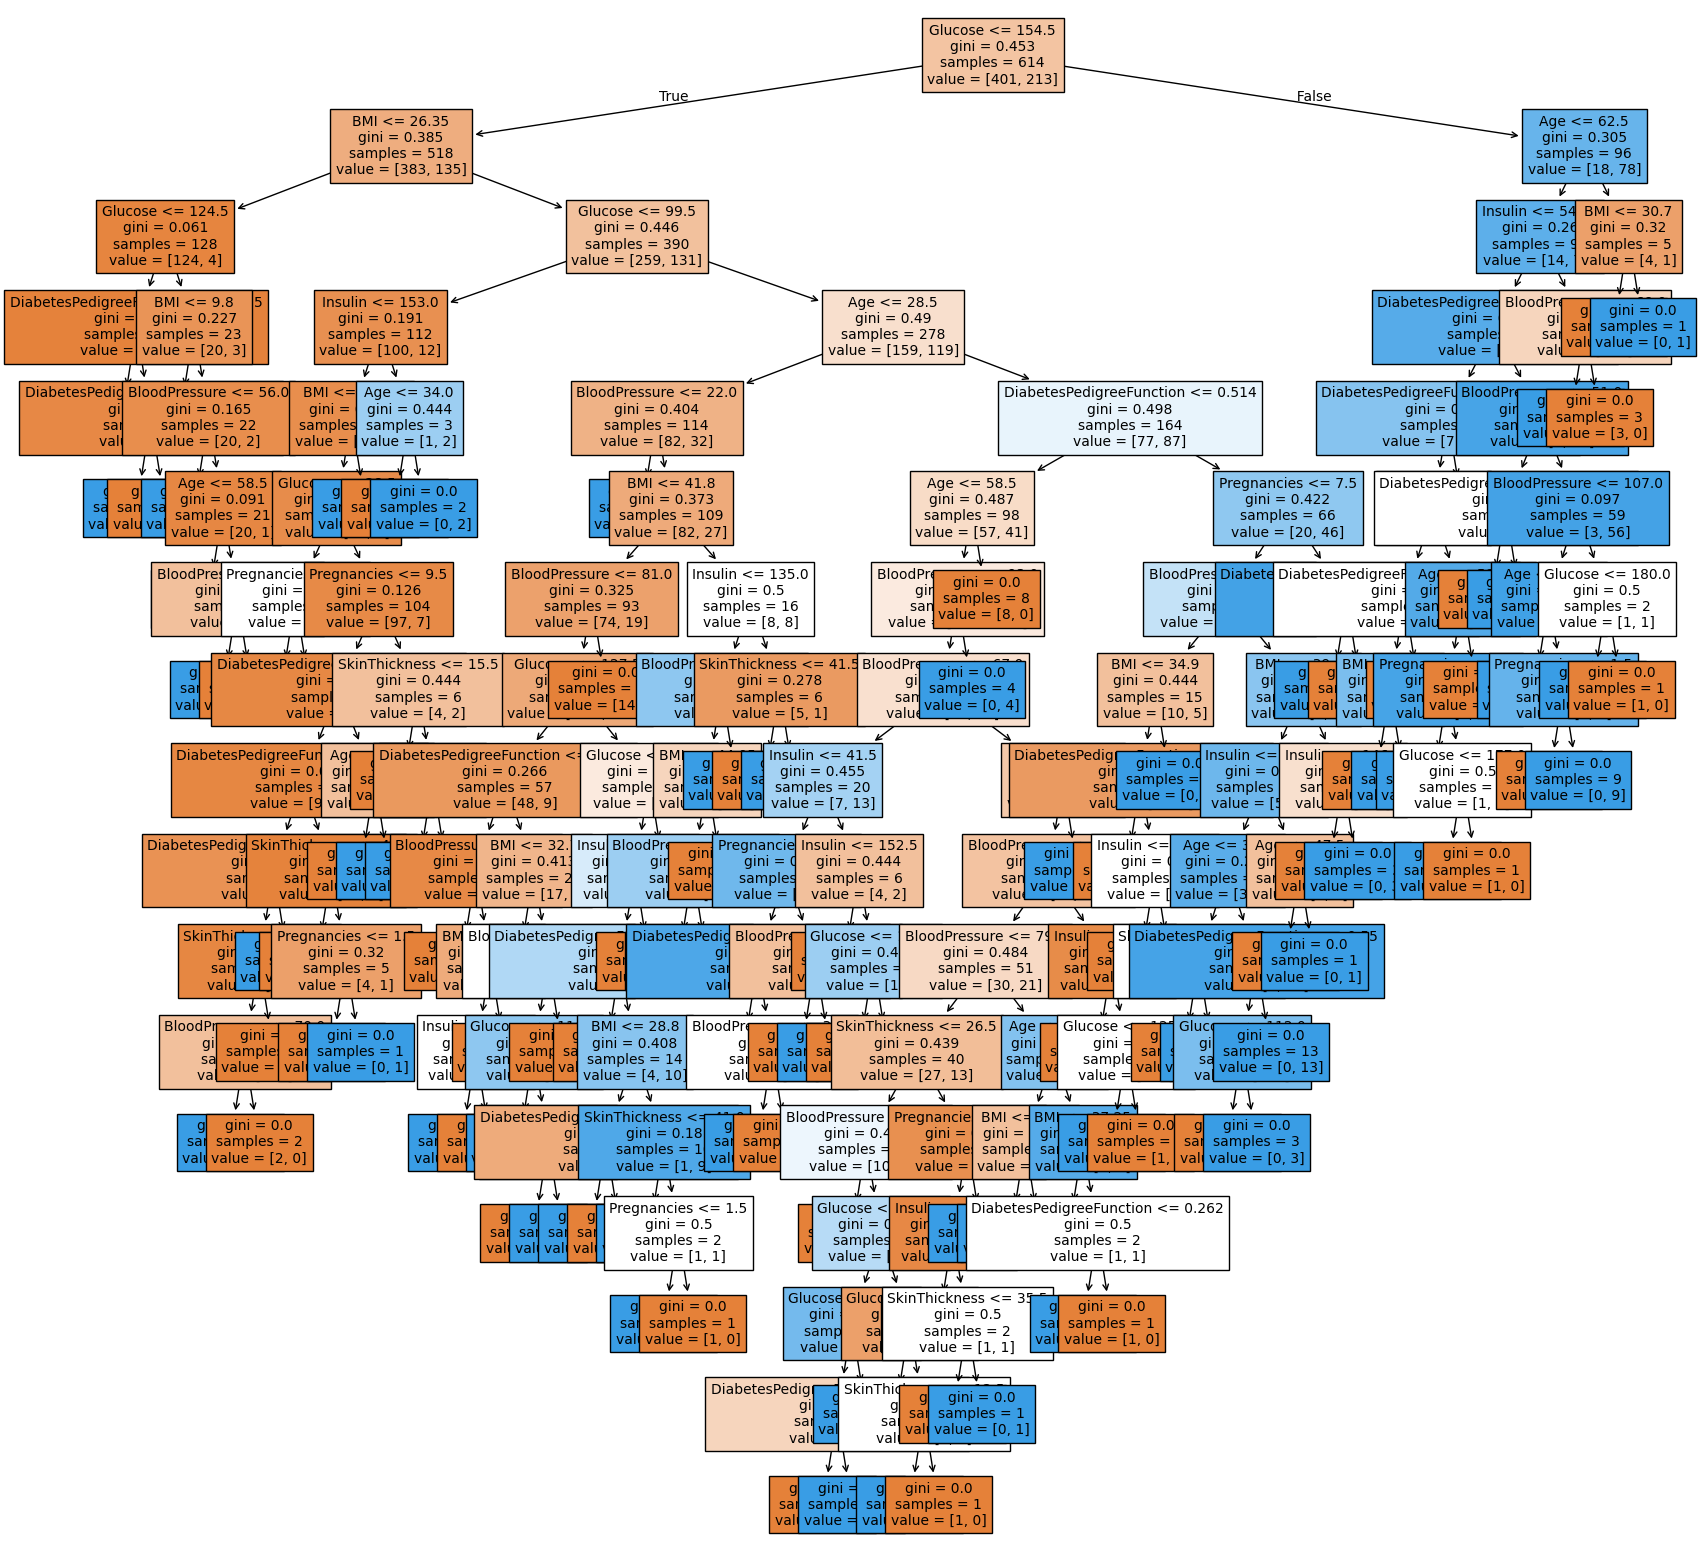

In [106]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
          feature_names=feature_names,
         filled=True,
         fontsize=10)

In [107]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.05957994, 0.31549284, 0.14062208, 0.04401581, 0.07625329,
       0.15767773, 0.11272871, 0.0936296 ])

<Axes: >

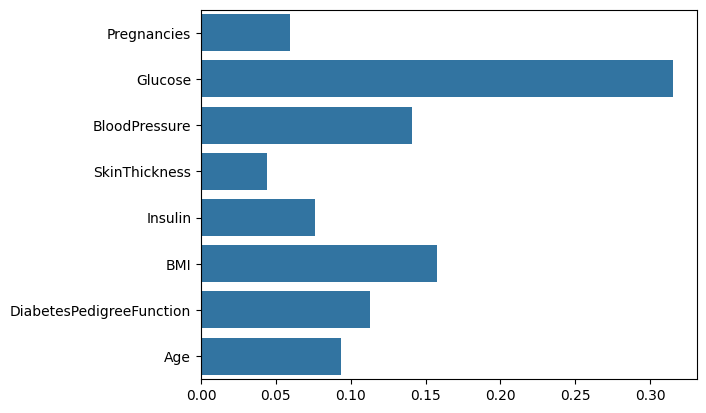

In [113]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

**정확도 측정하기**

In [126]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나옴
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됨

diff_count = abs(y_test - y_predict).sum()
diff_count

np.int64(37)

In [130]:
# 예측의 정확도를 구한다.

(len(y_test) - diff_count) / len(y_test) * 100

np.float64(75.97402597402598)

In [136]:
# 미리 구현된 알고리즘을 가져와 사용할 수도 있음

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

75.97402597402598

In [137]:
# model의 score로 점수를 계산한다
model.score(X_test, y_test) * 100

75.97402597402598

# 2. EDA를 통해 데이터 탐색하기

### 2.1.1 당뇨병 데이터셋 미리보기

**라이브러리 로드**

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**데이터 로드**

In [141]:
df = pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [142]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [143]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보를 봅니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [147]:
# 결측치

df_null = df.isnull()
df_null.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        False    False          False          False    False  False   
1        False    False          False          False    False  False   
2        False    False          False          False    False  False   
3        False    False          False          False    False  False   
4        False    False          False          False    False  False   

   DiabetesPedigreeFunction    Age  Outcome  
0                     False  False    False  
1                     False  False    False  
2                     False  False    False  
3                     False  False    False  
4                     False  False    False

In [148]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [149]:
# 수치데이터에 대한 요약

df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [156]:
# 가장 마지막에 있는 outcome 은 label 값이기 때문에 제외하고
# 학습과 예측에 사용할 컬럼을 만들어 준다
# feature_columns 라는 변수에 담아준다

feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 2.1.2 결측치 보기

값을 요약해 보면 최솟값이 0으로 나오는 값들이 있다

0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있다

따라서 0인 값을 결측치로 처리하고 시각화 해본다

In [160]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [166]:
# 결측치 여부를 나타내는 데이터프레임을 만든다
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 칼럼에 대해
# 결측치 여부를 구해서 df_null이라는 데이터프레임에 담는다

df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                     92847.000
BloodPressure               53073.000
SkinThickness               15772.000
Insulin                     61286.000
BMI                         24570.300
DiabetesPedigreeFunction      362.401
Age                         25529.000
dtype: float64

<Axes: >

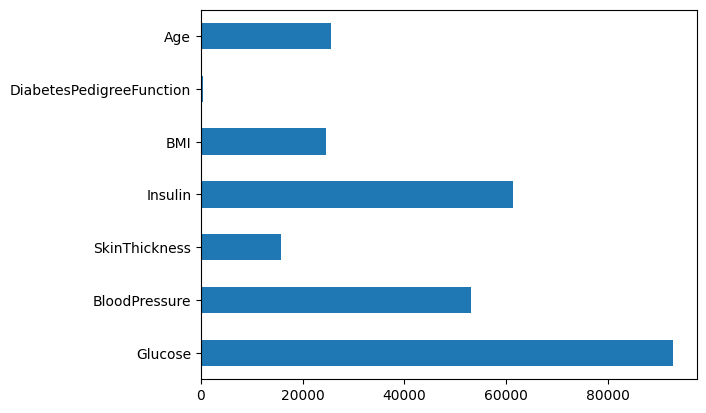

In [167]:
# 결측치의 갯수를 구해 막대 그래프로 시각화 한다
df_null.sum().plot.barh()

<Axes: >

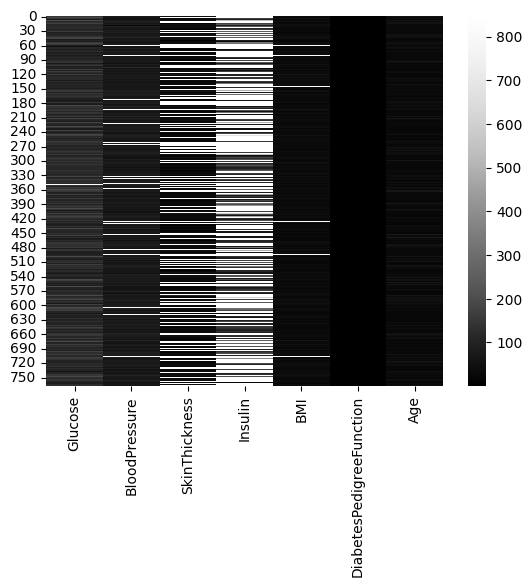

In [170]:
# 결측치를 heatmap으로 시각화한다
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys_r")

### 2.1.3 훈련과 예측에 사용할 정답값을 시각화로 보기

**정답값**

In [172]:
# 정답값인 outcome의 갯수를 본다

df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [173]:
# 정답값인 outcome의 비율을 본다
df["Outcome"].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [180]:
# 다른 변수와 함께 보기
# 임신횟수와 정답값 비교
# "Pregnancies"를 groupby로 그룹화해서 outcome에 대한 비율을 구한다
# 결과를 df_po라는 변수에 저장

df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

Pregnancies      mean  count
0             0  0.342342    111
1             1  0.214815    135
2             2  0.184466    103
3             3  0.360000     75
4             4  0.338235     68
5             5  0.368421     57
6             6  0.320000     50
7             7  0.555556     45
8             8  0.578947     38
9             9  0.642857     28
10           10  0.416667     24
11           11  0.636364     11
12           12  0.444444      9
13           13  0.500000     10
14           14  1.000000      2
15           15  1.000000      1
16           17  1.000000      1

<Axes: >

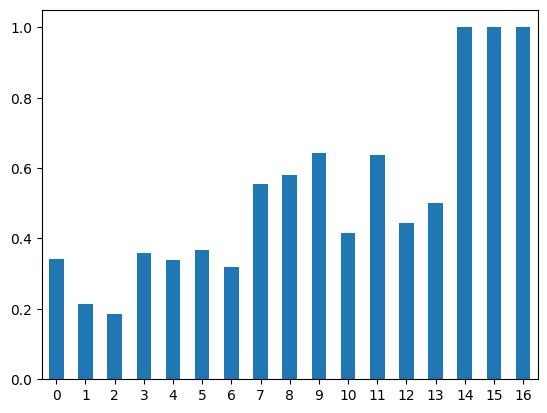

In [185]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po["mean"].plot.bar(rot=0)

**countplot**

<Axes: xlabel='Outcome', ylabel='count'>

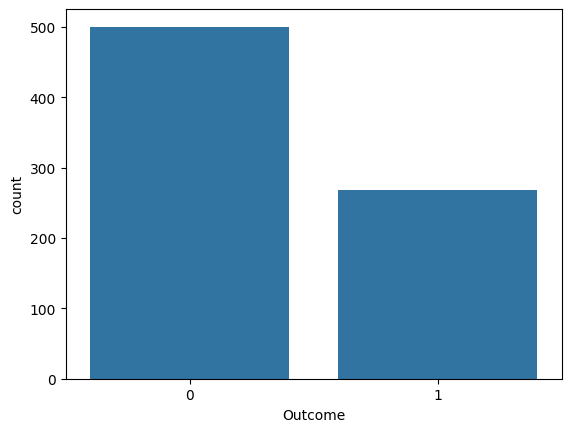

In [186]:
# 위에서 구했던 당뇨병 발병 비율을 구한다
# 당뇨병 발병 빈도수를 비교

sns.countplot(data=df, x="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

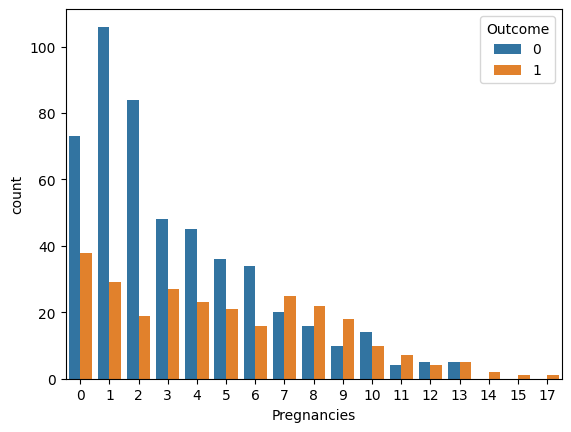

In [188]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교한다

sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [193]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만든다

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

<Axes: xlabel='Pregnancies_high', ylabel='count'>

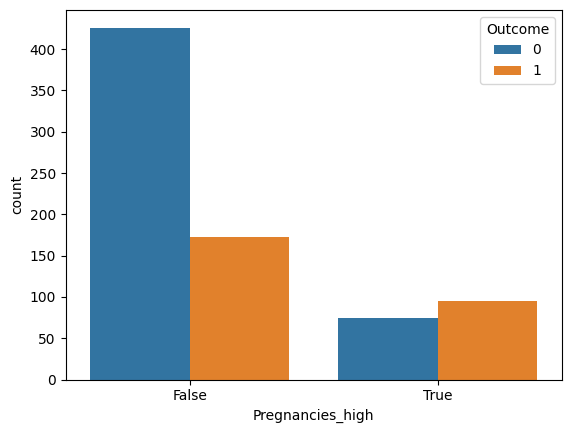

In [194]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현한다

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

### 2.1.4 두 개의 변수를 정답값에 따라 시각화 해보기

**barplot**

<Axes: xlabel='Outcome', ylabel='BMI'>

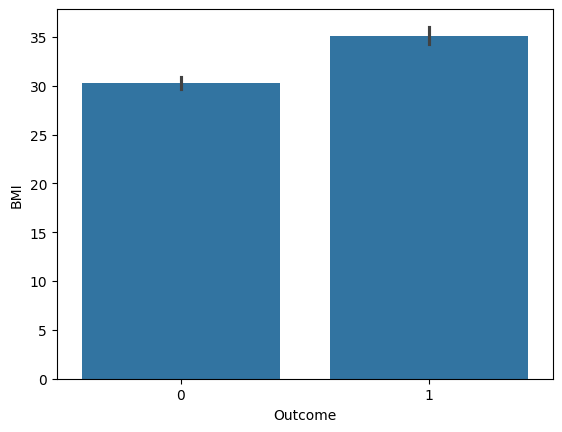

In [195]:
# 당뇨병 발병에 따른 BMI 수치 비교

sns.barplot(data=df, x="Outcome", y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

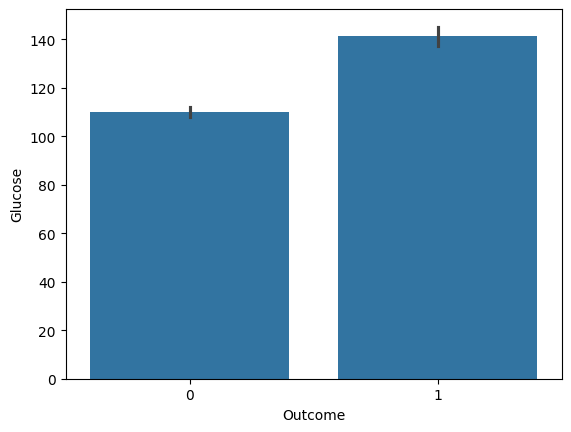

In [196]:
# 당뇨병 발병에 따른 포도당(Glucose) 수치를 비교

sns.barplot(data=df, x="Outcome", y="Glucose")

<Axes: xlabel='Outcome', ylabel='Insulin'>

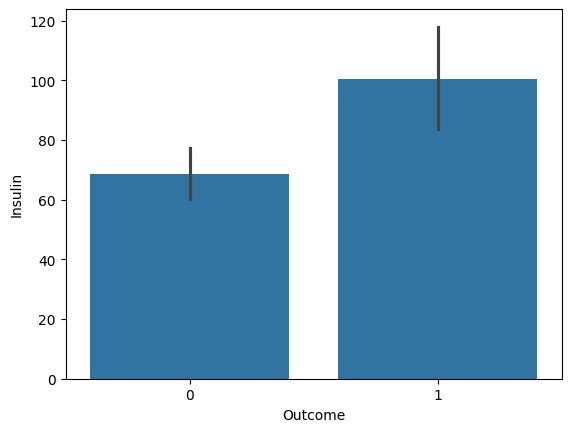

In [197]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교

sns.barplot(data=df, x="Outcome", y="Insulin")

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

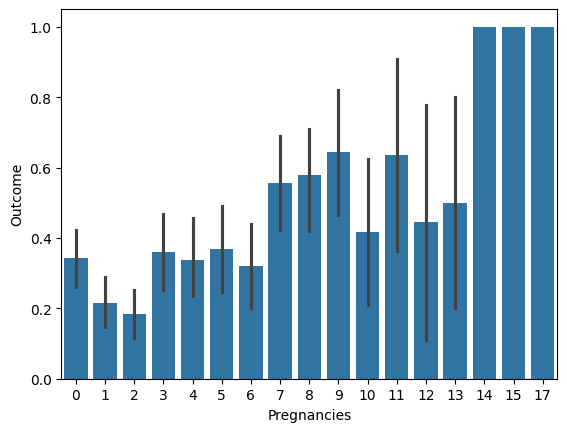

In [198]:
# 임신횟수에 대해서 당뇨병 발병 비율을 비교
sns.barplot(data=df, x="Pregnancies", y="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

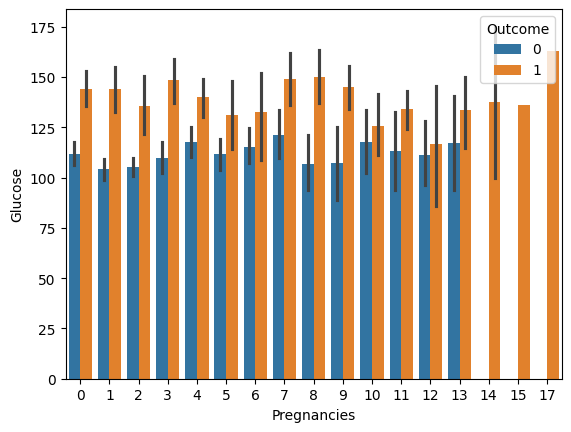

In [199]:
# 임신횟수(Pregnancies)에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='BMI'>

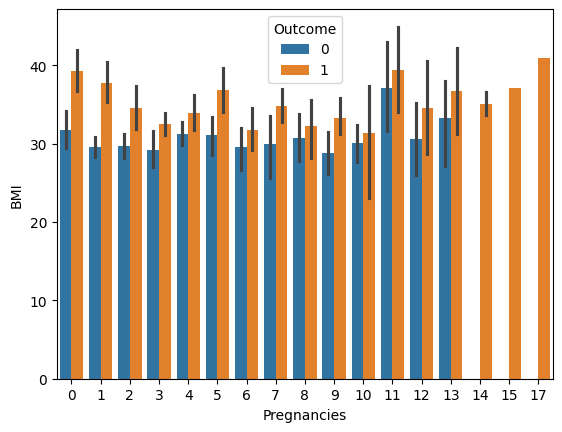

In [200]:
# 임신횟수에 따른 체질량지수를 당뇨병 발병여부에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

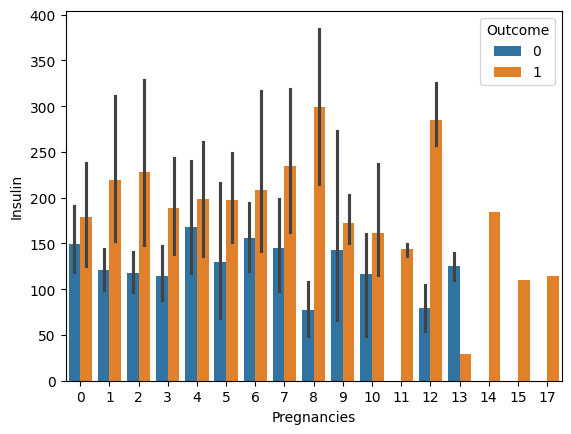

In [205]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그림

sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

**boxplot**

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

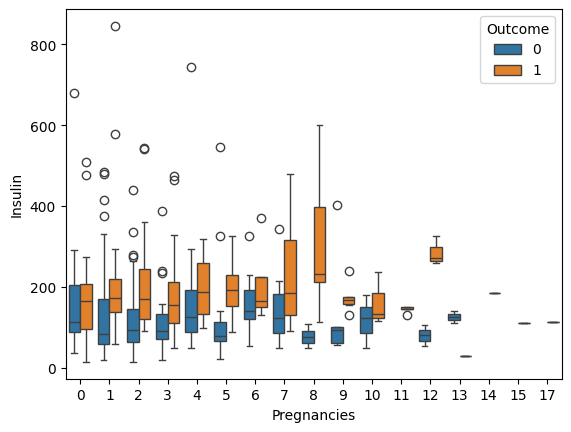

In [204]:
# 인슐린 수치에 결측치가 많으므로 0보다 큰 값에 대해서만 그림


sns.boxplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome")

**violinplot**

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

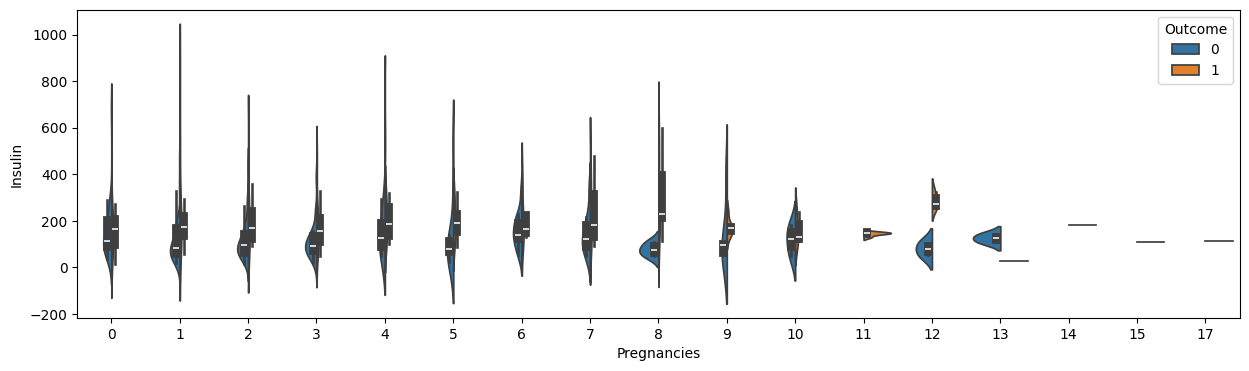

In [211]:
# split은 violinplot에만 있음

plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome", split=True )

**swarmplot**

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


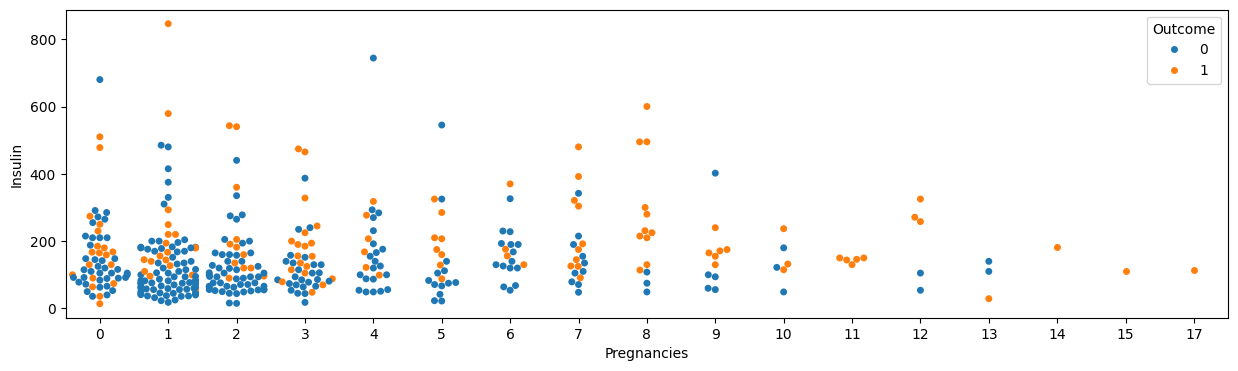

In [213]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0],
            x="Pregnancies", y="Insulin", hue="Outcome")

### 2.1.5 수치형 변수의 분포를 정답값에 따라 시각화

**distplot**

한 개의 수치형 변수를 갖는 범주형 데이터를 시각화 할 때 사용

In [219]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

/tmp/ipython-input-834454035.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

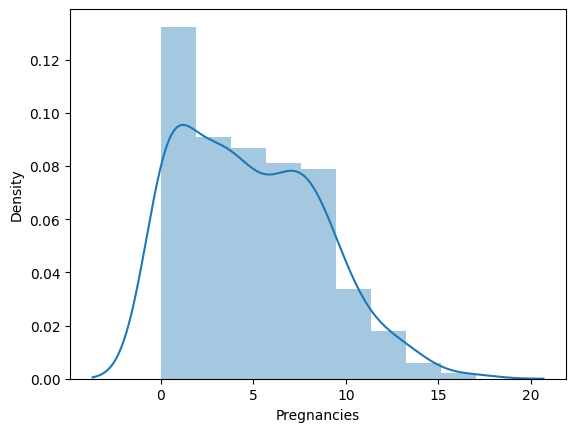

In [221]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화

sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

/tmp/ipython-input-3995409511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Age"], hist=False, rug=True, label=1)


<Axes: xlabel='Age', ylabel='Density'>

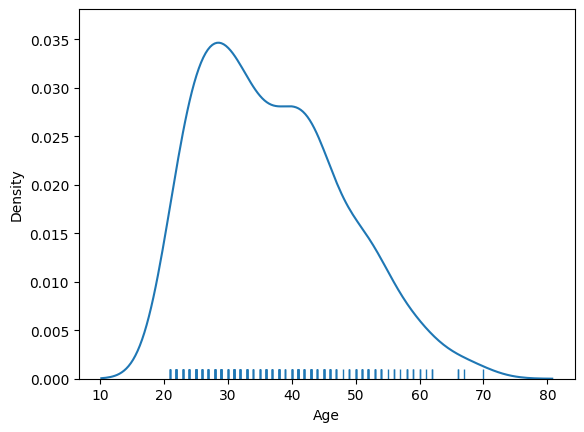

In [230]:
# 나이에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

### 2.1.6 서브플롯으로 모든 변수 한번에 시각화 하기

**Subplots**

Pandas를 통한 histplot 그리기

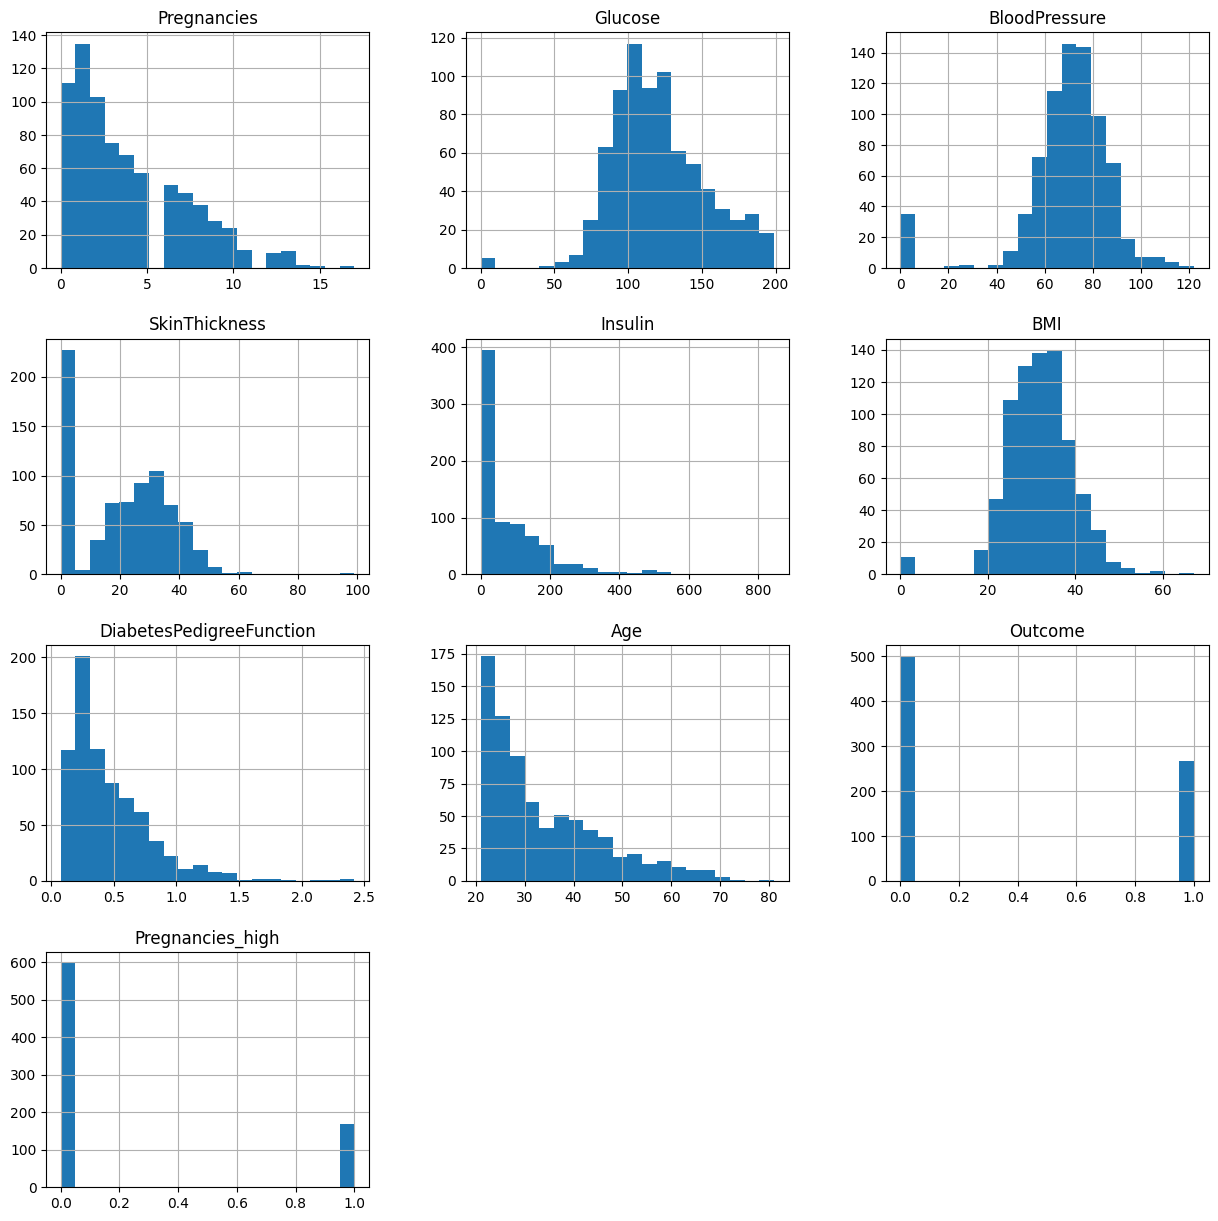

In [236]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=20)

반복문을 통한 서브플롯 그리기

In [255]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/tmp/ipython-input-404823945.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col], kde=True)
/tmp/ipython-input-404823945.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col], kde=True)
/tmp/ipython-input-404823945.py:8: UserWarning: 

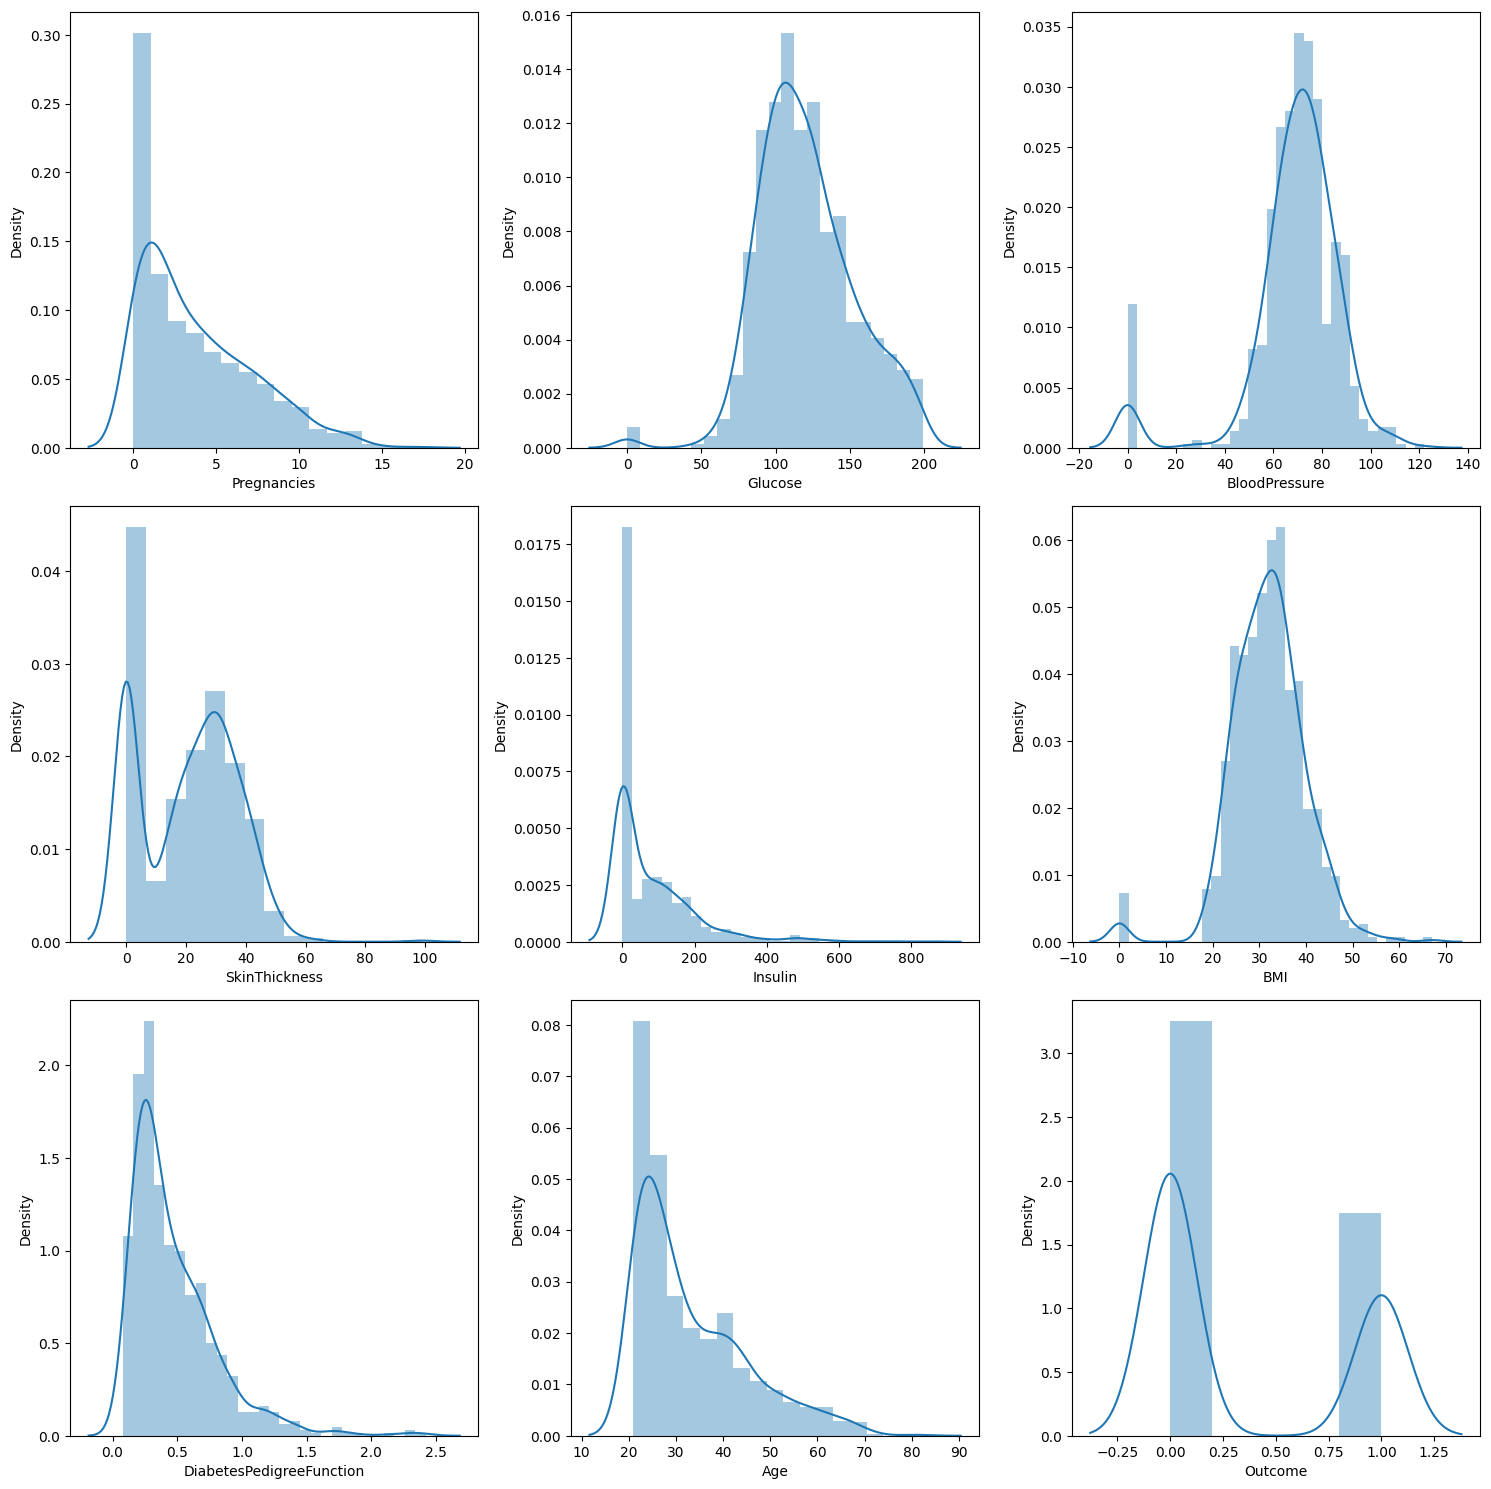

In [262]:
# distplot으로 서브플롯을 그림

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15));

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col], kde=True)

plt.tight_layout()
plt.show()

In [264]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

IndexError: index 3 is out of bounds for axis 0 with size 3

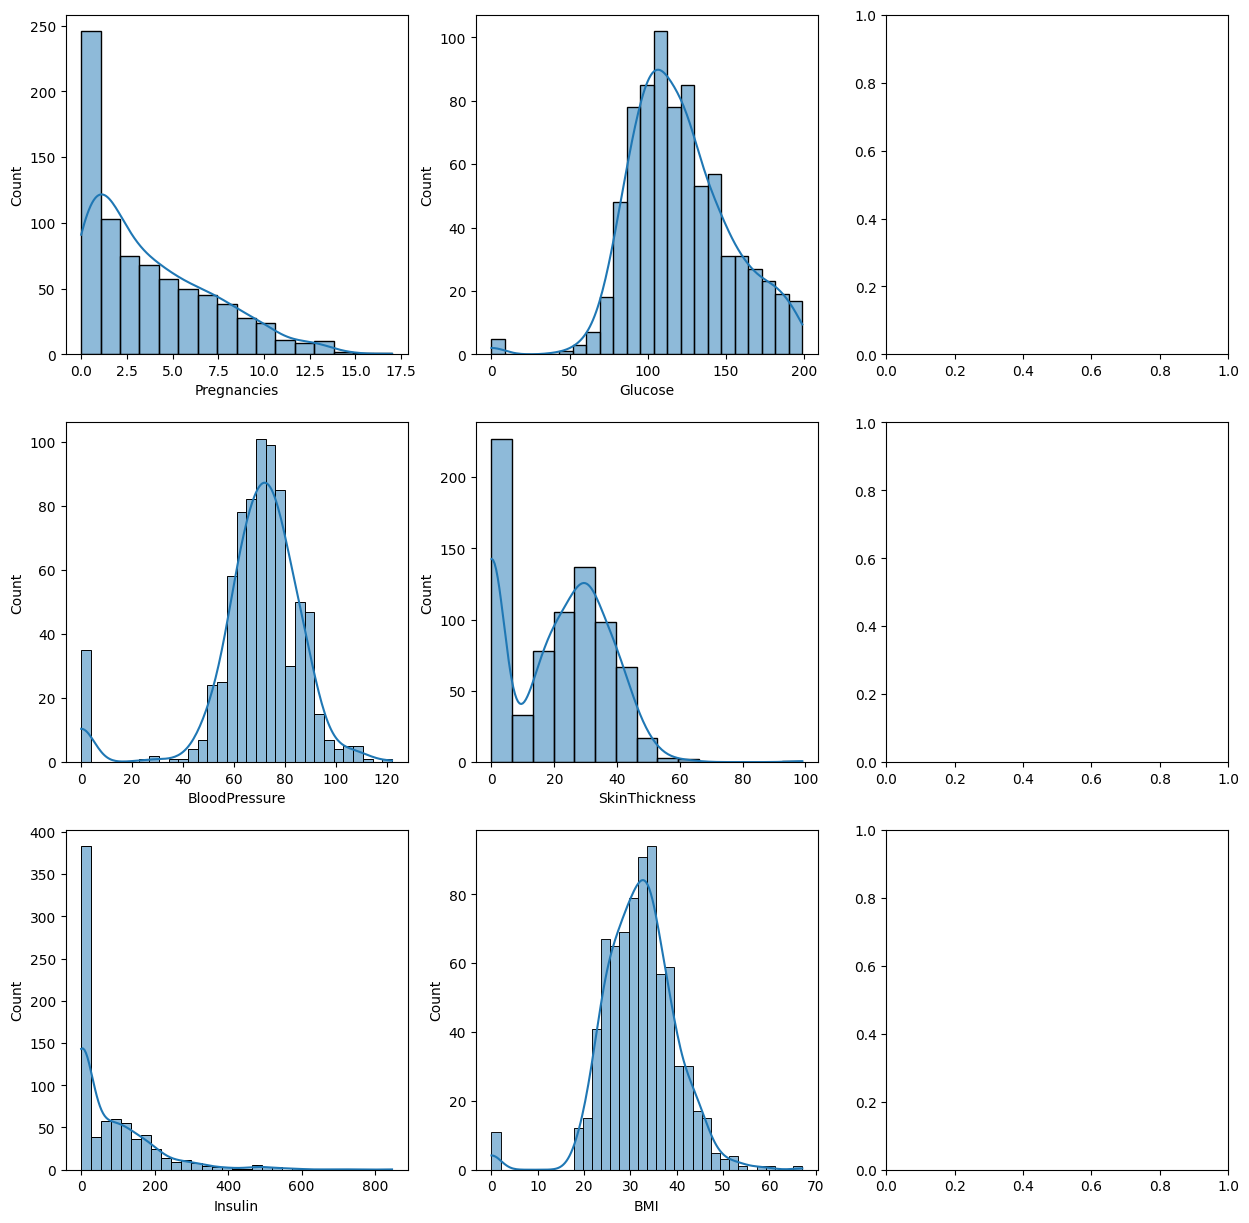

In [267]:
# 모든 변수에 대한 distplot을 그림

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15));

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=col_name, ax=axes[row][col], kde=True)

plt.tight_layout()
plt.show()

### 2.1.7 시각화를 통한 변수간의 차이 이해하기

**violinpot**

IndexError: index 3 is out of bounds for axis 0 with size 3

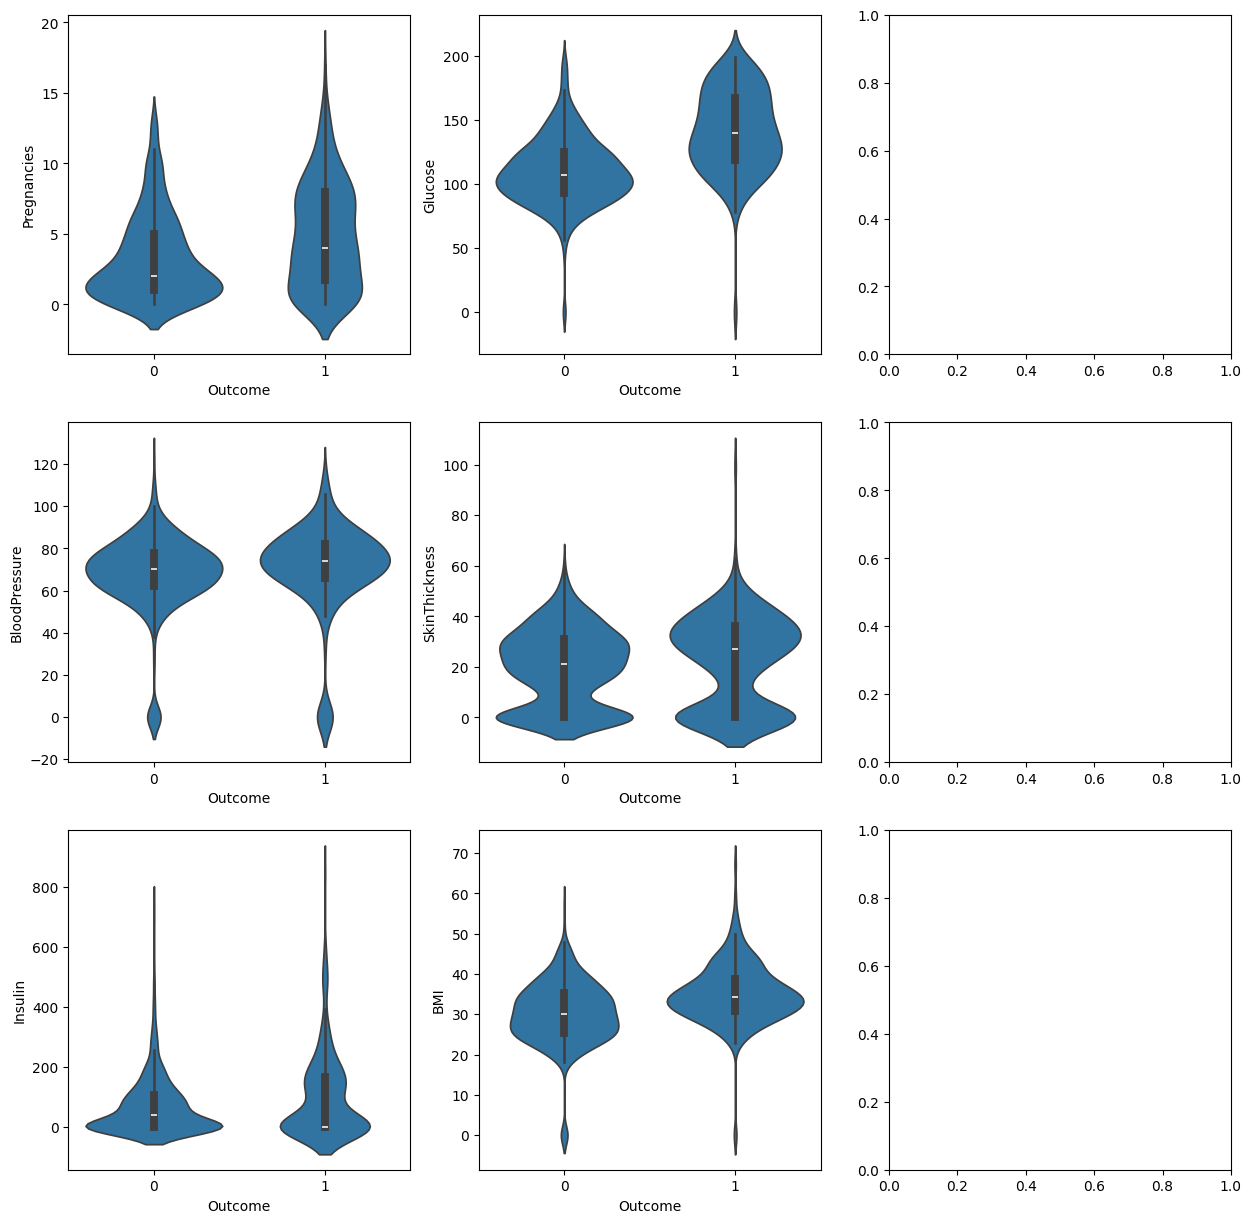

In [269]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15));

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

plt.tight_layout()
plt.show()

**lmplot**

상관계수가 높은 두 변수에 대해 시각화

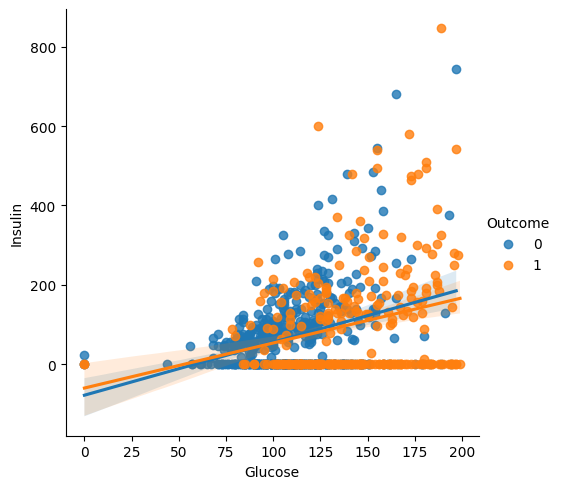

In [272]:
# Glucose와 Insulin을 Outcome으로 구분

sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

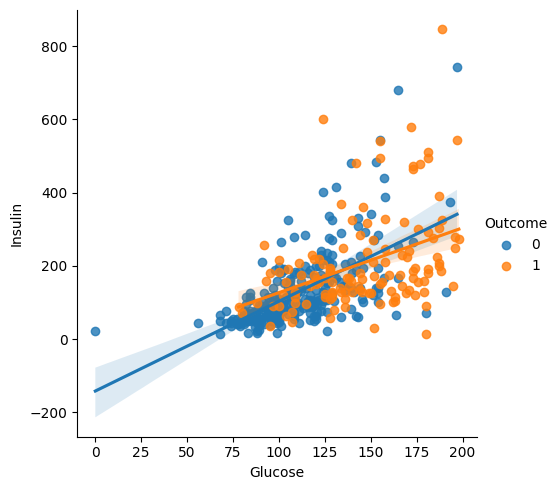

In [274]:
# Insulin 수치가 0 이상인 데이터로만 그리기

sns.lmplot(data=df[df["Insulin"]>0], x="Glucose", y="Insulin", hue="Outcome")

**pairplot**

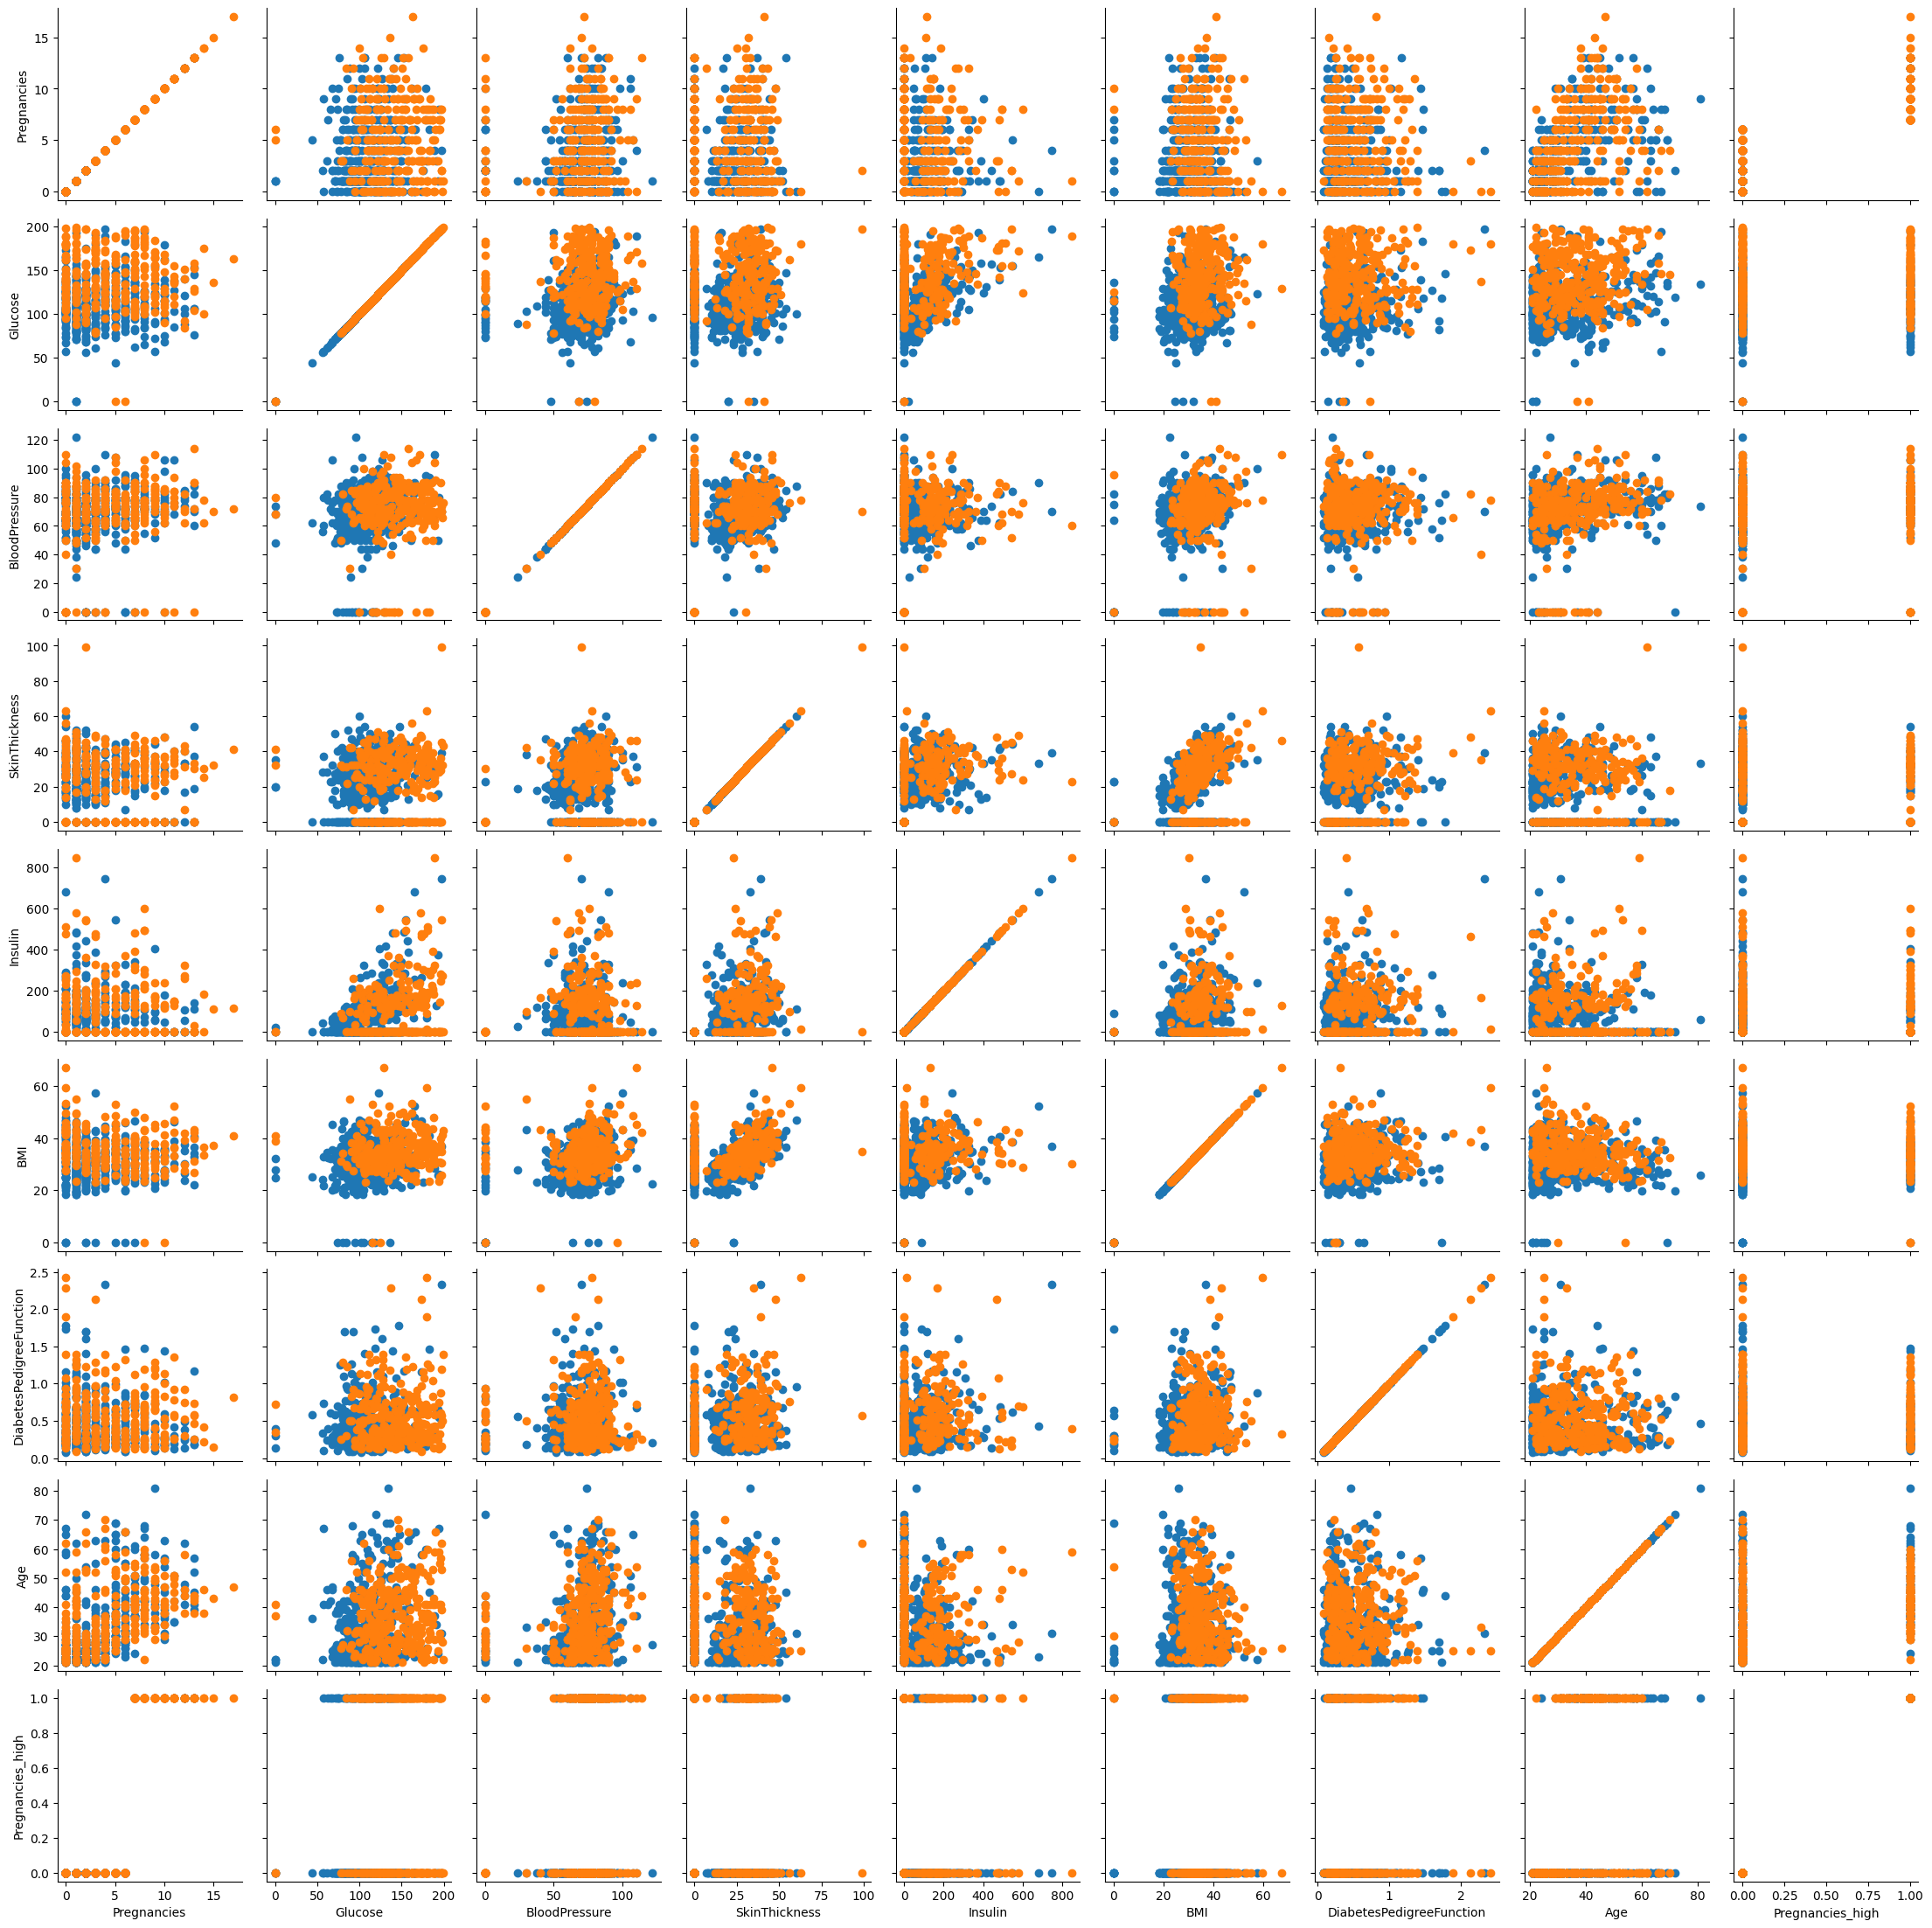

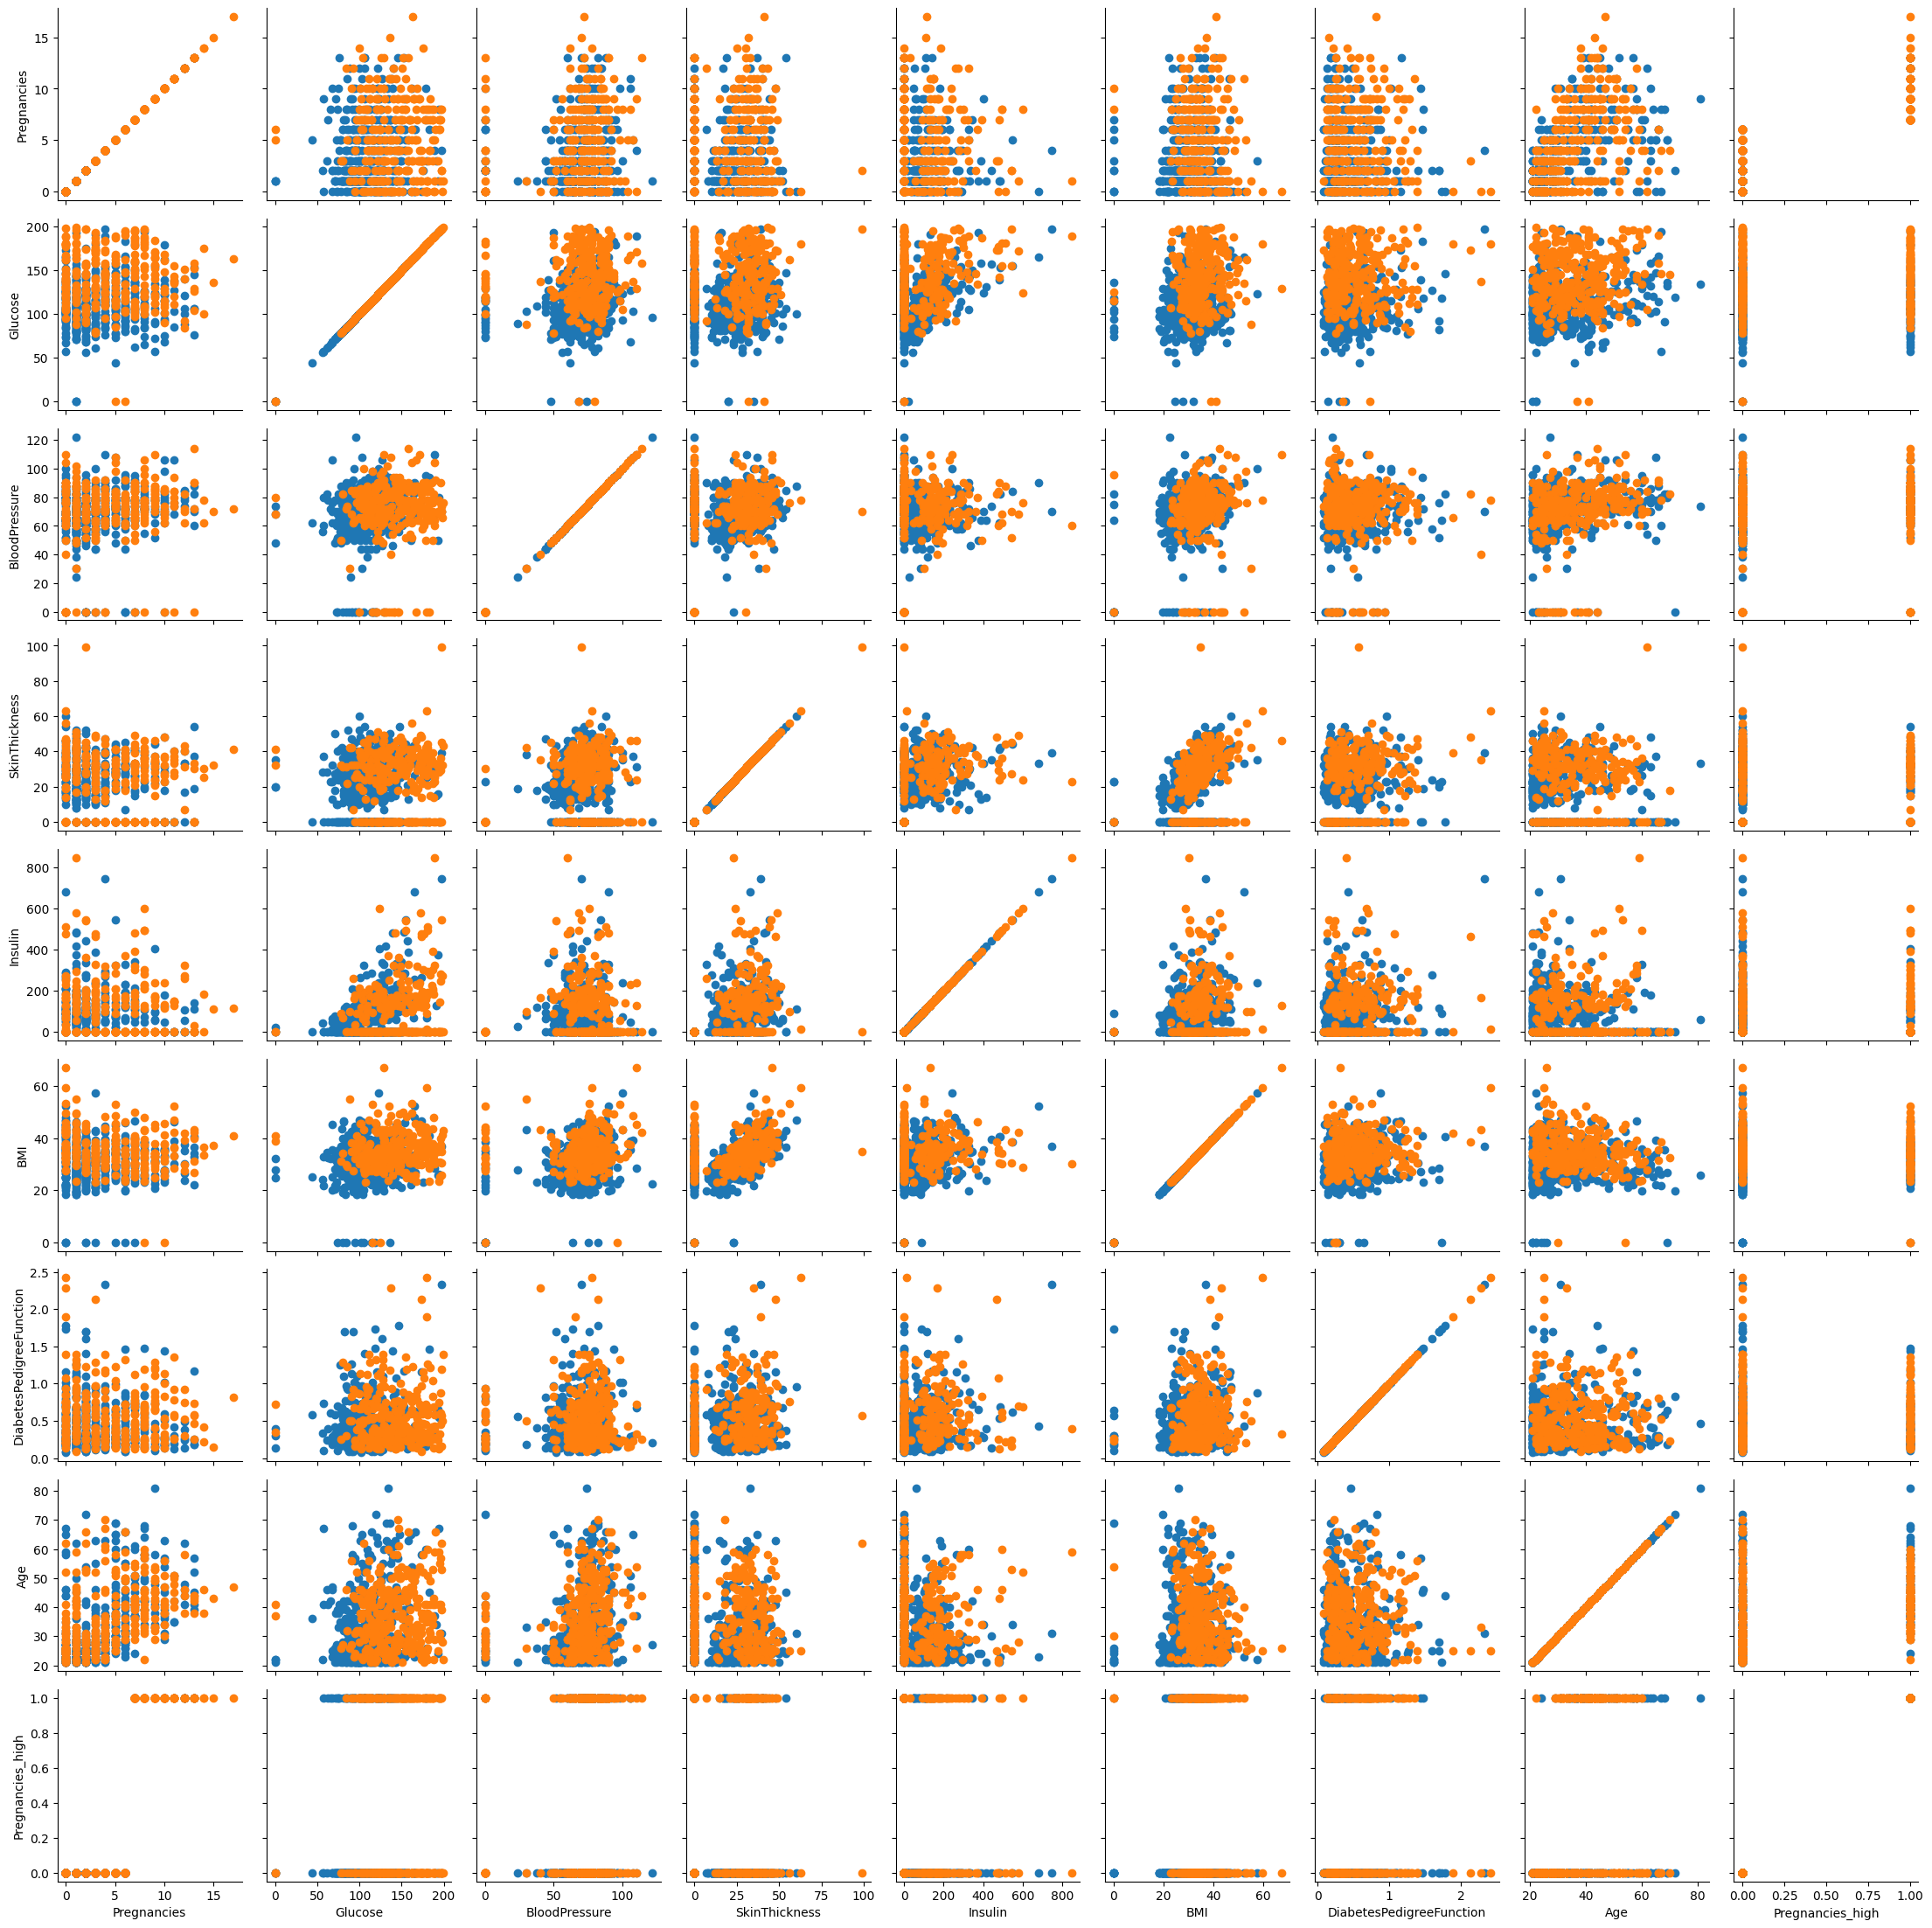

In [282]:
# PairGrid를 통해 모든 변수에 대해 Outcome에 따른 scatterplot을 그림

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

### 2.1.8 피처엔지니어링을 위한 상관 계수 분석하기

r이 -1.0과 -0.7 사이라면, 강한 음적 선형관계

r이 -0.7과 -0.3 사이라면, 뚜렷한 음적 선형관계

r이 -0.3과 -0.1 사이라면, 약한 음적 선형관계

r이 -0.1과 +0.1 사이라면, 거의 무시될 수 있는 선형관계

r이 +0.1과 +0.3 사이라면, 약한 양적 선형관계

r이 +0.3과 +0.7 사이라면, 뚜렷한 양적 선형관계

r이 +0.7과 +1.0 사이라면, 강한 양적 선형관계

In [298]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan) #0값을 결측치로
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [299]:
# 정답 값인 outcome을 제외 하고 feature로 사용할 칼럼들에 대해 0을 결측치로 만들어 준다
# 상관계수를 구한다

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

<Axes: >

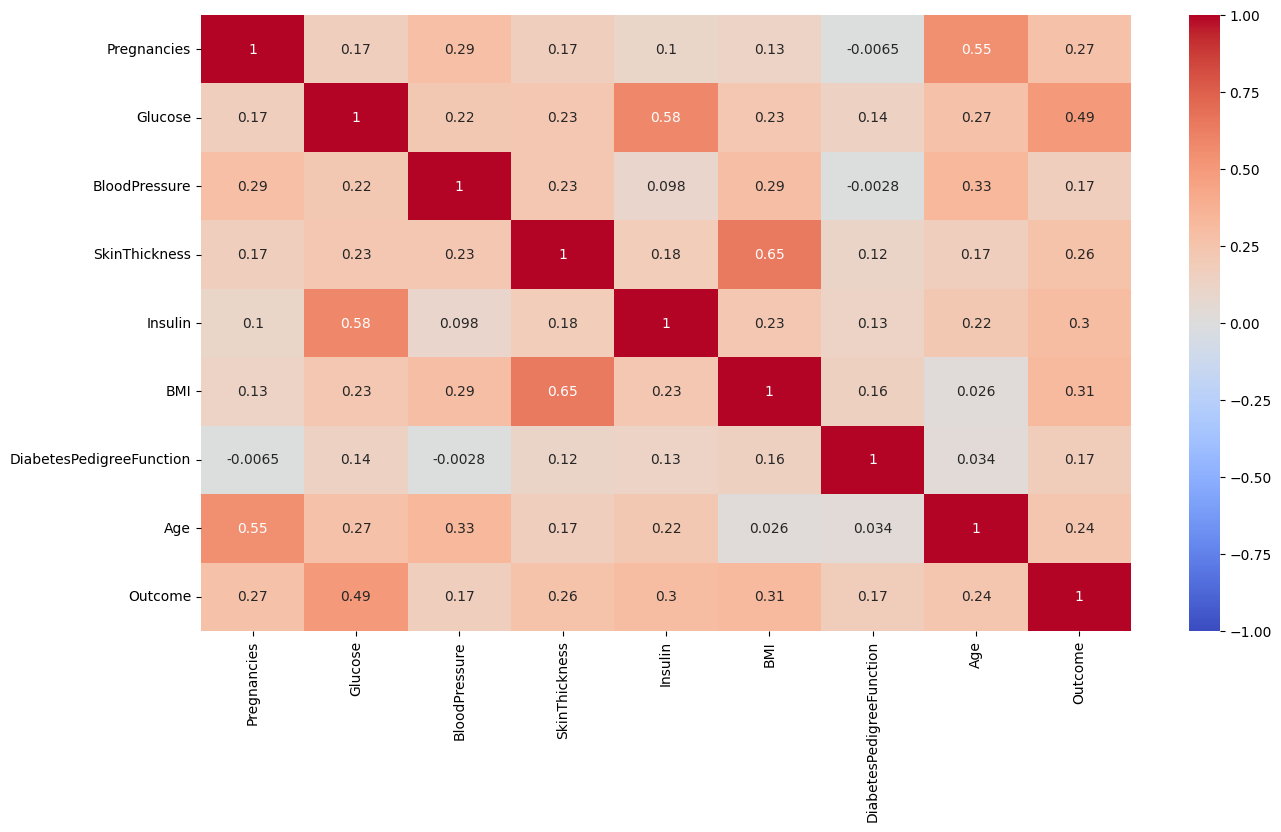

In [300]:
# 위에서 구한 상관계수를 heatmap으로 시각화 한다
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [301]:
# outcome 수치에 대한 상관계수만 모아서 본다

df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

**상관계수가 높은 변수끼리 보기**

<Axes: xlabel='Insulin', ylabel='Glucose'>

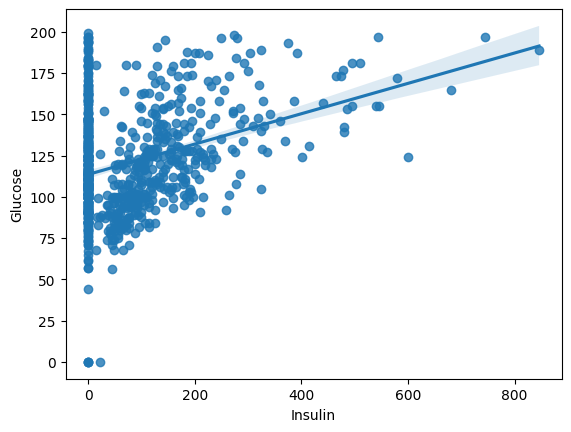

In [304]:
# Insulin과 Glucose로 regplot 그리기

sns.regplot(data=df, x="Insulin", y="Glucose")

<Axes: xlabel='Insulin', ylabel='Glucose'>

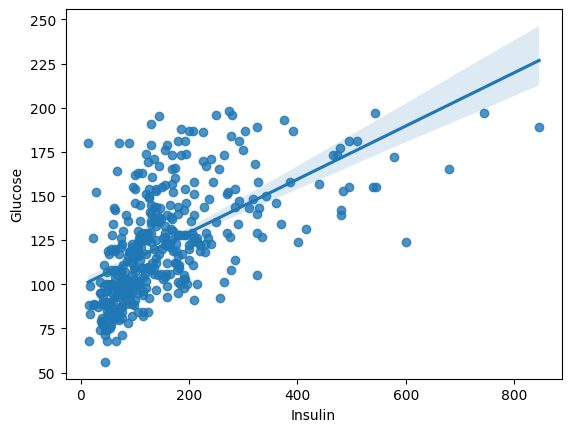

In [305]:
# df_0으로 결측치 처리한 데이터프레임으로
# Insulin과 Glucose로 regplot 그리기

sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

<Axes: xlabel='Age', ylabel='Pregnancies'>

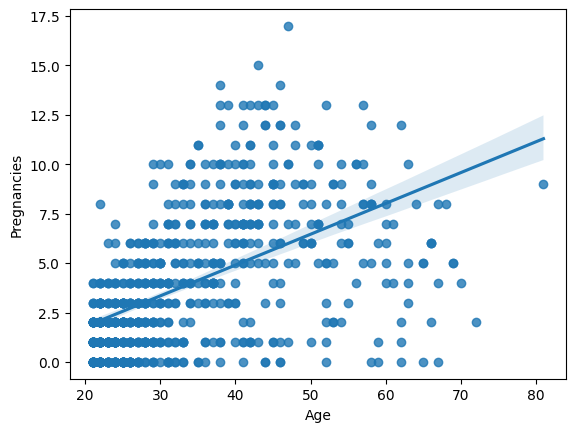

In [306]:
# Age와 Pregnancies로 regplot 그리기

sns.regplot(data=df, x="Age", y="Pregnancies")

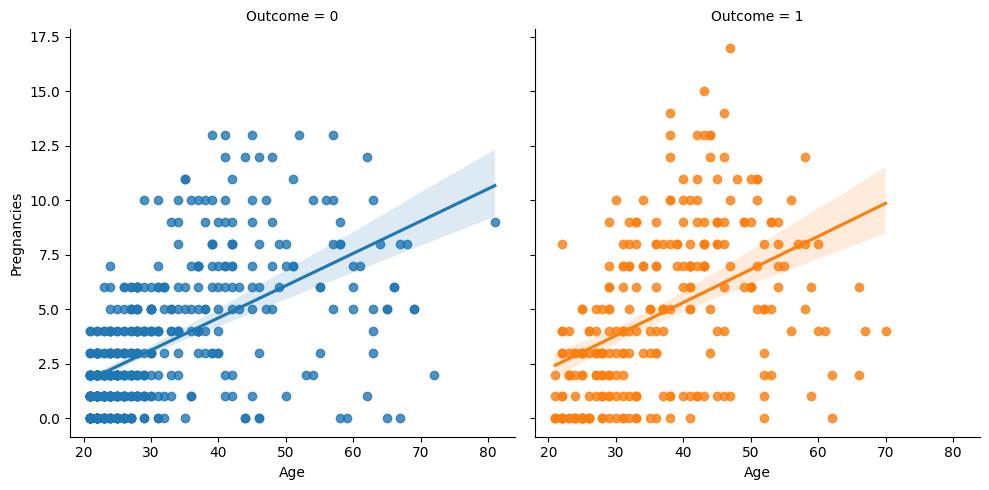

In [308]:
# Age와 Pregnancies로 lmplot을 그리고 outcome에 따라 다른 색상으로 표현

sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")